In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize

In [3]:
movie = pd.read_csv("https://bootrain-lms-assets.s3.eu-central-1.amazonaws.com/bootrain-lms-static/datasets/movie_winsorize.csv")

In [4]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,winsorize_num_critic_for_reviews,winsorize_duration,winsorize_gross
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,313.0,134.0,760505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,302.0,134.0,309404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,313.0,134.0,200074175.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,313.0,134.0,448130642.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,448130642.0,Documentary,...,NaN,NaN,NaN,12.0,7.1,NaN,0,313.0,134.0,NaN


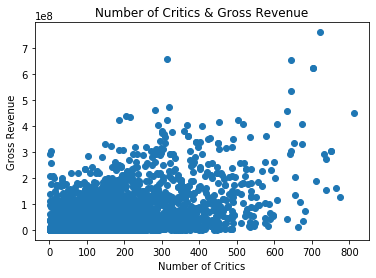

In [5]:
plt.scatter(movie['num_critic_for_reviews'],movie['gross'])
plt.title('Number of Critics & Gross Revenue')
plt.xlabel('Number of Critics')
plt.ylabel('Gross Revenue')
plt.show()

In [6]:
movie.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,winsorize_num_critic_for_reviews,winsorize_duration,winsorize_gross
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.485743,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176,0.946365,0.306140,0.480601
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.227557,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605,0.223450,0.875087,0.250298
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.140639,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048,0.145757,0.183155,0.144945
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.309573,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844,0.219414,0.136208,0.308026
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.151909,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348,0.179685,0.111685,0.154468
gross,0.485743,0.227557,0.140639,0.309573,0.151909,1.000000,0.624402,0.241250,-0.023903,0.557551,0.111368,0.049601,0.268811,0.182225,-0.000680,0.375735,0.415506,0.232203,1.000000
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.624402,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924,0.551392,0.309909,0.637271
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.241250,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786,0.236398,0.148239,0.247400
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.023903,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918,-0.037516,0.025164,-0.027755
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.557551,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594,0.565904,0.318502,0.559958


In [7]:
movie_mat_youtube=movie.corr()

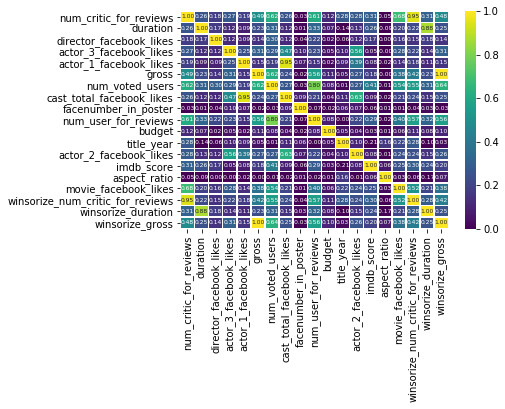

In [11]:
sns.heatmap(movie_mat_youtube,annot=True,fmt='.2f',annot_kws={'size':6},linewidths=.5,vmin=0,vmax=1,cmap='viridis');

## Financial and Economic Data Sources and APIs

### Yahoo Finance

In [12]:
!pip install yfinance

In [14]:
import yfinance as yf
import datetime

In [15]:
stock=['AAPL','MSFT','INTC']
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2020,4,9)
stocks=yf.download(stock,start=start,end=end,interval='1d')

[*********************100%***********************]  3 of 3 downloaded


In [16]:
stocks.head()

Adj Close               Close                High                \
                AAPL   INTC   MSFT  AAPL   INTC   MSFT  AAPL   INTC   MSFT   
Date                                                                         
2009-12-31      6.50  14.72  23.80  7.53  20.40  30.48  7.62  20.72  30.99   
2010-01-04      6.60  15.06  24.17  7.64  20.88  30.95  7.66  21.03  31.10   
2010-01-05      6.62  15.06  24.18  7.66  20.87  30.96  7.70  20.99  31.10   
2010-01-06      6.51  15.01  24.03  7.53  20.80  30.77  7.69  20.93  31.08   
2010-01-07      6.50  14.86  23.78  7.52  20.60  30.45  7.57  20.76  30.70   

             Low                Open                   Volume            \
            AAPL   INTC   MSFT  AAPL   INTC   MSFT       AAPL      INTC   
Date                                                                      
2009-12-31  7.52  20.40  30.48  7.61  20.60  30.98  352410800  26429200   
2010-01-04  7.59  20.73  30.59  7.62  20.79  30.62  493729600  47800900   
2010-01-05  7.62  20.60  30.64  7.66  20.94  30.85  601904800  52357700   
2010-01-06  7.53  20.67  30.52  7.66  20.81  30.88  552160000  40037400   
2010-01-07  7.47  20.34  30.19  7.56  20.73  30.63  477131200  54041500   

                      
                MSFT  
Date                  
2009-12-31  31929700  
2010-01-04  38409100  
2010-01-05  49749600  
2010-01-06  58182400  
2010-01-07  50559700

In [17]:
stocks.Close

,AAPL,INTC,MSFT
Date,,,
2009-12-31,7.53,20.40,30.48
2010-01-04,7.64,20.88,30.95
2010-01-05,7.66,20.87,30.96
2010-01-06,7.53,20.80,30.77
2010-01-07,7.52,20.60,30.45
...,...,...,...
2020-04-02,61.23,54.35,155.26
2020-04-03,60.35,54.13,153.83
2020-04-06,65.62,58.43,165.27


### FRED

In [ ]:
!pip install fredapi

In [18]:
from fredapi import Fred

In [19]:
fred=Fred(api_key='78b14ec6ba46f484b94db43694468bb1')

In [20]:
fred.search('interest')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
FEDFUNDS,FEDFUNDS,2020-09-22,2020-09-22,Effective Federal Funds Rate,1954-07-01,2020-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2020-09-01 15:22:01-05:00,96,Averages of daily figures. The federal funds ...
DFF,DFF,2020-09-22,2020-09-22,Effective Federal Funds Rate,1954-07-01,2020-09-21,"Daily, 7-Day",D,Percent,%,Not Seasonally Adjusted,NSA,2020-09-22 15:23:05-05:00,83,The federal funds rate is the interest rate at...
DGS10,DGS10,2020-09-22,2020-09-22,10-Year Treasury Constant Maturity Rate,1962-01-02,2020-09-21,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2020-09-22 15:22:12-05:00,96,For further information regarding treasury con...
BAMLH0A0HYM2,BAMLH0A0HYM2,2020-09-22,2020-09-22,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2020-09-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2020-09-22 08:38:15-05:00,100,The ICE BofA Option-Adjusted Spreads (OASs) ar...
FF,FF,2020-09-22,2020-09-22,Effective Federal Funds Rate,1954-07-07,2020-09-16,"Weekly, Ending Wednesday",W,Percent,%,Not Seasonally Adjusted,NSA,2020-09-17 15:23:02-05:00,58,Averages of daily figures. The federal funds ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W562RC1A027NBEA,W562RC1A027NBEA,2020-09-22,2020-09-22,"Interest-related imputations: Net interest, do...",1929-01-01,2011-01-01,Annual,A,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2013-03-31 22:44:15-05:00,1,BEA Account Code: W562RC1 For more informatio...
W565RC1A027NBEA,W565RC1A027NBEA,2020-09-22,2020-09-22,"Interest-related imputations: Net interest, do...",1929-01-01,2019-01-01,Annual,A,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2020-08-27 08:03:43-05:00,1,BEA Account Code: W565RC For more information...
W556RC1A027NBEA,W556RC1A027NBEA,2020-09-22,2020-09-22,"Interest-related imputations: Net interest, do...",1929-01-01,2011-01-01,Annual,A,Billions of Dollars,Bil. of $,Not Seasonally Adjusted,NSA,2013-03-31 23:04:48-05:00,1,BEA Account Code: W556RC1 For more informatio...


In [21]:
interest=fred.get_series('FEDFUNDS')

In [22]:
interest

1954-07-01    0.80
1954-08-01    1.22
1954-09-01    1.06
1954-10-01    0.85
1954-11-01    0.83
              ... 
2020-04-01    0.05
2020-05-01    0.05
2020-06-01    0.08
2020-07-01    0.09
2020-08-01    0.10
Length: 794, dtype: float64

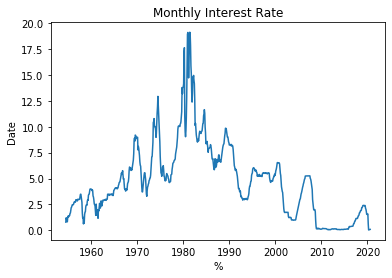

In [23]:
plt.plot(interest)
plt.title('Monthly Interest Rate')
plt.xlabel('%')
plt.ylabel('Date')
plt.show()

## Quandl

In [ ]:
!pip install quandl

In [24]:
import quandl

In [25]:
oil=quandl.get('EIA/PET_RWTC_D',authtoken='sezjeVxkKghvxARoxQAo',start_date='2010-01-01',end_date='2020-01-01')

In [26]:
oil.head()

,Value
Date,
2010-01-04,81.52
2010-01-05,81.74
2010-01-06,83.12
2010-01-07,82.60
2010-01-08,82.74


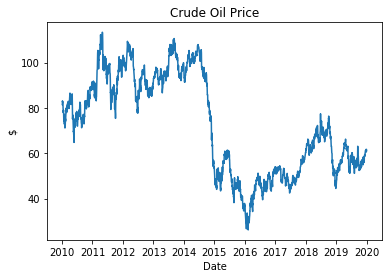

In [27]:
plt.plot(oil)
plt.title('Crude Oil Price')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

## World Bank Data

In [ ]:
!pip install world_bank_data

In [28]:
import world_bank_data as wb

In [29]:
wb.get_sources()

,lastupdated,name,code,description,url,dataavailability,metadataavailability,concepts
id,,,,,,,,
1,2019-10-23,Doing Business,DBS,,,Y,Y,3
2,2020-09-16,World Development Indicators,WDI,,,Y,Y,3
3,2019-11-07,Worldwide Governance Indicators,WGI,,,Y,Y,3
5,2016-03-21,Subnational Malnutrition Database,SNM,,,Y,Y,3
6,2020-09-04,International Debt Statistics,IDS,,,Y,Y,3
...,...,...,...,...,...,...,...,...
76,2018-01-22,Remittance Prices Worldwide (Sending Countries),RWS,,,Y,N,3
77,2018-01-22,Remittance Prices Worldwide (Receiving Countries),RWR,,,Y,N,3
78,2020-07-10,ICP 2017,IC7,,,Y,Y,4


In [30]:
wb.search_indicators('',source=2)

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
AG.AGR.TRAC.NO,"Agricultural machinery, tractors",,World Development Indicators,Agricultural machinery refers to the number of...,"Food and Agriculture Organization, electronic ...",Agriculture & Rural Development
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer produc...,,World Development Indicators,Fertilizer consumption measures the quantity o...,"Food and Agriculture Organization, electronic ...",Agriculture & Rural Development
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare ...,,World Development Indicators,Fertilizer consumption measures the quantity o...,"Food and Agriculture Organization, electronic ...",Agriculture & Rural Development
AG.LND.AGRI.K2,Agricultural land (sq. km),,World Development Indicators,Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...","Agriculture & Rural Development ,Climate Change"
AG.LND.AGRI.ZS,Agricultural land (% of land area),,World Development Indicators,Agricultural land refers to the share of land ...,"Food and Agriculture Organization, electronic ...","Agriculture & Rural Development ,Climate Chan..."
...,...,...,...,...,...,...
VC.IDP.TOCV,"Internally displaced persons, total displaced ...",,World Development Indicators,Internally displaced persons are defined accor...,The Internal Displacement Monitoring Centre (h...,Public Sector
VC.IHR.PSRC.FE.P5,"Intentional homicides, female (per 100,000 fem...",,World Development Indicators,"Intentional homicides, female are estimates of...",UN Office on Drugs and Crime's International H...,
VC.IHR.PSRC.MA.P5,"Intentional homicides, male (per 100,000 male)",,World Development Indicators,"Intentional homicides, male are estimates of u...",UN Office on Drugs and Crime's International H...,


In [31]:
wb.search_indicators('unemployment')

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
fin37.t.a,Received government transfers in the past year...,,Global Financial Inclusion,The percentage of respondents who report perso...,Global Findex database,
fin37.t.a.1,Received government transfers in the past year...,,Global Financial Inclusion,The percentage of respondents who report perso...,Global Findex database,
fin37.t.a.10,Received government transfers in the past year...,,Global Financial Inclusion,The percentage of respondents who report perso...,Global Findex database,
fin37.t.a.11,Received government transfers in the past year...,,Global Financial Inclusion,The percentage of respondents who report perso...,Global Findex database,
fin37.t.a.2,Received government transfers in the past year...,,Global Financial Inclusion,The percentage of respondents who report perso...,Global Findex database,
...,...,...,...,...,...,...
SL.UEM.TOTL.MA.NE.ZS,"Unemployment, male (% of male labor force) (na...",,World Development Indicators,Unemployment refers to the share of the labor ...,"International Labour Organization, ILOSTAT dat...",Social Protection & Labor
SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (mo...",,World Development Indicators,Unemployment refers to the share of the labor ...,"International Labour Organization, ILOSTAT dat...","Education ,Social Protection & Labor,Gender,So..."
SL.UEM.TOTL.NE.ZS,"Unemployment, total (% of total labor force) (...",,World Development Indicators,Unemployment refers to the share of the labor ...,"International Labour Organization, ILOSTAT dat...",Social Protection & Labor


In [34]:
wb.search_countries('turkey')

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
TUR,TR,Turkey,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Ankara,32.3606,39.7153


In [33]:
unemployment=wb.get_series('SL.UEM.TOTL.ZS',country='USA',date='2010:2020',id_or_value='id',simplify_index='True')
unemployment

Year
2010    9.633
2011    8.949
2012    8.069
2013    7.375
2014    6.168
2015    5.280
2016    4.869
2017    4.355
2018    3.896
2019    3.682
2020    3.862
Name: SL.UEM.TOTL.ZS, dtype: float64

In [35]:
unemployment=wb.get_series('SL.UEM.TOTL.ZS',country=['USA','TUR'],date='2010:2020',id_or_value='id',simplify_index='True')
unemployment

Country  Year
TUR      2010    10.660
         2011     8.796
         2012     8.149
         2013     8.732
         2014     9.880
         2015    10.236
         2016    10.839
         2017    10.819
         2018    10.890
         2019    13.490
         2020    12.941
USA      2010     9.633
         2011     8.949
         2012     8.069
         2013     7.375
         2014     6.168
         2015     5.280
         2016     4.869
         2017     4.355
         2018     3.896
         2019     3.682
         2020     3.862
Name: SL.UEM.TOTL.ZS, dtype: float64

## Regression

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\epsilon$$

In [9]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
insurance_df=pd.read_csv('insurance.csv')

In [7]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


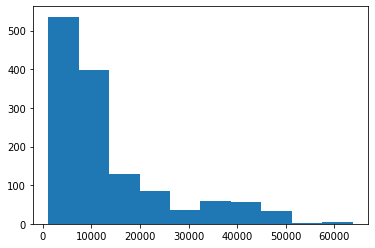

In [11]:
plt.hist(insurance_df.charges);

In [17]:
insurance_df['is_male']=pd.get_dummies(insurance_df.sex,drop_first=True)
insurance_df['is_smoker']=pd.get_dummies(insurance_df.smoker,drop_first=True)

In [18]:
insurance_df

,age,sex,bmi,children,smoker,region,charges,is_male,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


Text(0, 0.5, 'Average Cost')

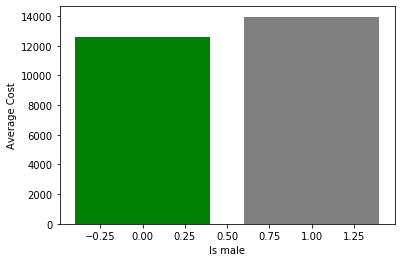

In [15]:
plt.bar(insurance_df.groupby('is_male')['charges'].mean().index,insurance_df.groupby('is_male')['charges'].mean(),color=('green','grey'))
plt.xlabel('Is male')
plt.ylabel('Average Cost')

Text(0, 0.5, 'Average Cost')

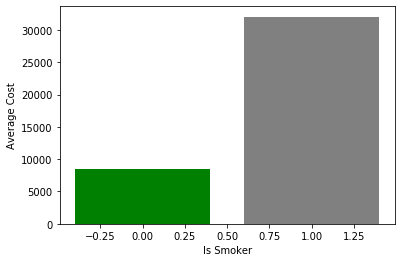

In [19]:
plt.bar(insurance_df.groupby('is_smoker')['charges'].mean().index,insurance_df.groupby('is_smoker')['charges'].mean(),color=('green','grey'))
plt.xlabel('Is Smoker')
plt.ylabel('Average Cost')

$$charges=\beta_0+\beta_1\text{is_smoker}+\epsilon$$

In [20]:
Y=insurance_df['charges']
X=insurance_df[['is_male','is_smoker']]

In [22]:
lrm=LinearRegression()
lrm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('Coefficients',lrm.coef_)

Coefficients [  -65.37843464 23622.1345855 ]


In [24]:
print('Intercept',lrm.intercept_)

Intercept 8466.035826716778


In [25]:
import statsmodels.api as sm
X=sm.add_constant(X)
results=sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1088.
Date:                Wed, 23 Sep 2020   Prob (F-statistic):          4.78e-281
Time:                        03:35:42   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1335   BIC:                         2.768e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8466.0358    303.541     27.891      0.000    7870.566    9061.506
is_male      -65.3784    409.809     -0.160      0.873    -869.318     738.561
is_smoker   2.362e+04    507.736     46.524      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      135.842   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.897
Skew:                           0.727   Prob(JB):                     9.71e-47
Kurtosis:                       4.299   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$H_0:\beta_i=0$$

$$H_A: \beta_i!=0$$

* Linearity in coefficient
* Constant variance (homoscedasticity)
* Low collinearity
* Uncorrelated error terms
* Independent variables should be correlated with error term
* Error term should be zero on average